In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import data set
df = pd.read_csv('forestfires.csv')

# Data Overview

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
print(f'Shape of data set:\n\n {df.shape} \n')
print('----'*10)
print(f'Values: \n\n {df.values} \n')
print('----'*10)
print(f'Columns: \n\n{df.columns}\n')
print('----'*10)
print('Short data analyse: \n')
df.describe()

Shape of data set:

 (517, 13) 

----------------------------------------
Values: 

 [[7 5 'mar' ... 6.7 0.0 0.0]
 [7 4 'oct' ... 0.9 0.0 0.0]
 [7 4 'oct' ... 1.3 0.0 0.0]
 ...
 [7 4 'aug' ... 6.7 0.0 11.16]
 [1 4 'aug' ... 4.0 0.0 0.0]
 [6 3 'nov' ... 4.5 0.0 0.0]] 

----------------------------------------
Columns: 

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

----------------------------------------
Short data analyse: 



,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
#df['area']=df['area'].map({ 1090.84:0})
#indexNames = df[ (df['area'] > 1000)].index
#df.drop(indexNames , inplace=True)


In [6]:
import numpy as np
def area_burn(sale_col):
    egligible_valu=np.where(sale_col > 800,0,sale_col)
    return egligible_valu
#primena funkcije na kolonu
df["area_reduced"]=area_burn(df["area"])
#primena funkcije na ceo dataset
dfnew=df.select_dtypes(include=["int64","float64"]).apply(area_burn)
dfnew

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_reduced
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             517 non-null    int64  
 1   Y             517 non-null    int64  
 2   month         517 non-null    object 
 3   day           517 non-null    object 
 4   FFMC          517 non-null    float64
 5   DMC           517 non-null    float64
 6   DC            517 non-null    float64
 7   ISI           517 non-null    float64
 8   temp          517 non-null    float64
 9   RH            517 non-null    int64  
 10  wind          517 non-null    float64
 11  rain          517 non-null    float64
 12  area          517 non-null    float64
 13  area_reduced  517 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 56.7+ KB


In [8]:
df_area=df.area.value_counts()
df_area.head()

0.00    247
1.94      3
3.71      2
0.90      2
1.95      2
Name: area, dtype: int64

In [9]:
df.loc[df['area']>1000]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_reduced
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,0.0


In [10]:
# function to identify missing value from all features
def missing_values (dataset):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False))
    missing_values= pd.concat([total,percent], axis=1, keys= ['Total', 'Percent'])
    return missing_values
print('Missing Values from Fire Forest data set')
print()
print (missing_values (df))

Missing Values from Fire Forest data set

              Total  Percent
area_reduced      0      0.0
area              0      0.0
rain              0      0.0
wind              0      0.0
RH                0      0.0
temp              0      0.0
ISI               0      0.0
DC                0      0.0
DMC               0      0.0
FFMC              0      0.0
day               0      0.0
month             0      0.0
Y                 0      0.0
X                 0      0.0


In [11]:
#create funcion to identify all numeric data
def numeric(data):
    numeric_cols = data.select_dtypes(np.number).columns.tolist()
    return data[numeric_cols].head(3)
print('Numeric features of data set are:')
print()
numeric_df= numeric(df)
print(numeric_df)

Numeric features of data set are:

   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  area_reduced
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0           0.0
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0           0.0
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0           0.0


In [12]:
#create funcion to identify all categorical data
def categoric(data):
    categoric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    return data[categoric_cols].head(3)
print('Categoric features of data set are:')
print()
categoric_df= categoric(df)
print(categoric_df)

Categoric features of data set are:

  month  day
0   mar  fri
1   oct  tue
2   oct  sat


# Exploratory Data Analysis

(12.5, -0.5)

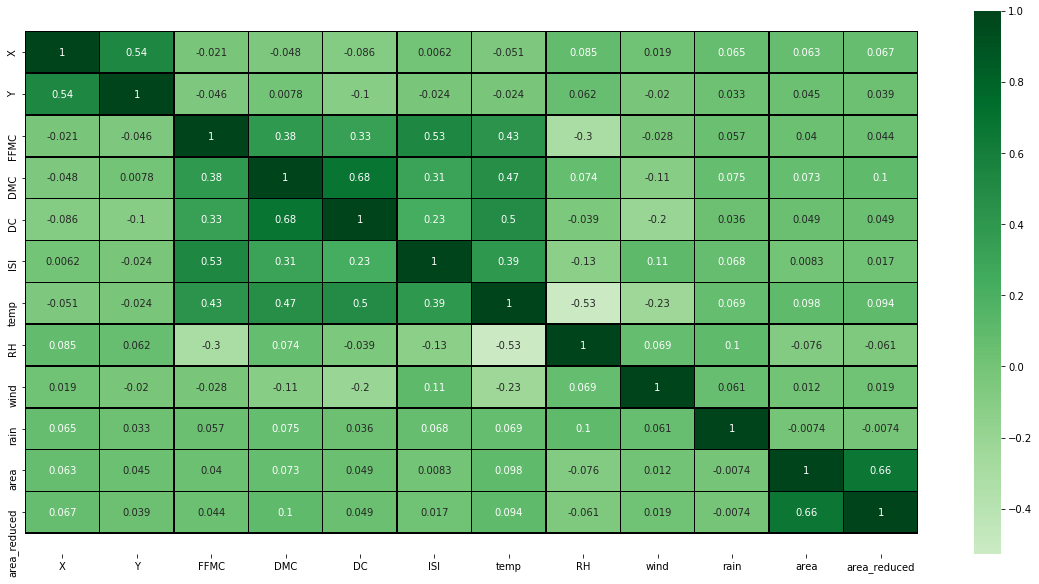

In [13]:
# correlation 
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='Greens',annot_kws={'size': 10},
                linecolor='black', center=False,  linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

As we can see, there is no high correlation between the characteristics that other than temp and FVI indices

In [14]:
df_num= df.drop(['month', 'day', 'area'], axis = 1)

In [15]:
num_cols= [col_name for col_name in df_num]
len(num_cols)

11

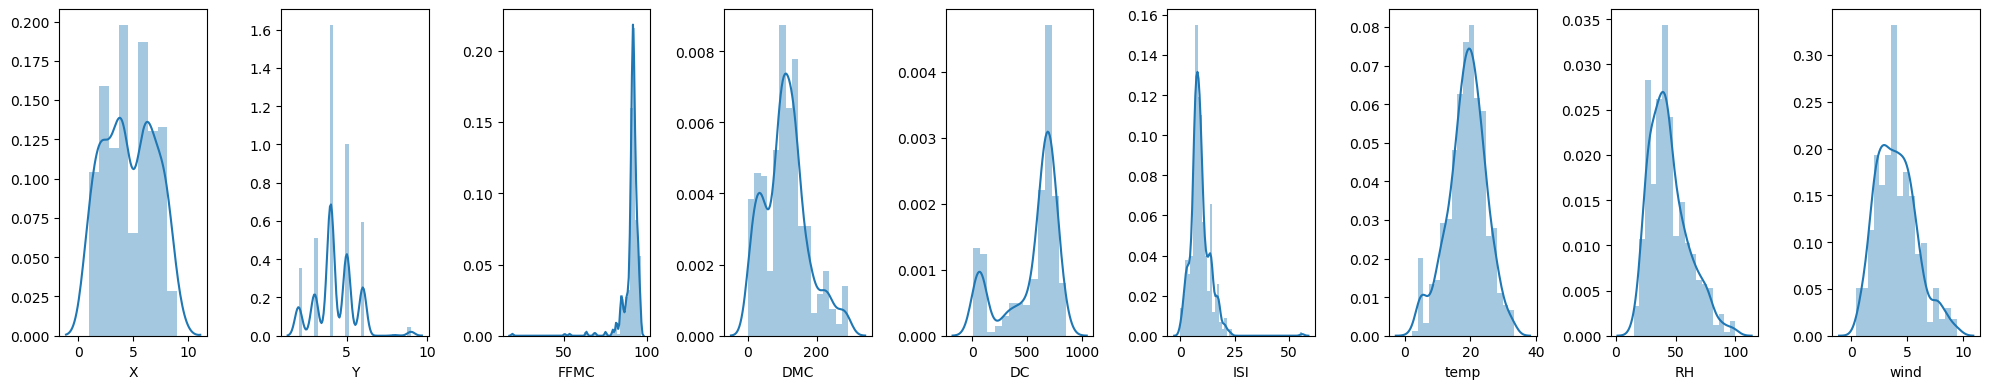

In [16]:
# Let see some visualisation of features

cols = ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,9,i)
    sns.distplot(df[col])
    i = i+1
plt.tight_layout()
plt.show()

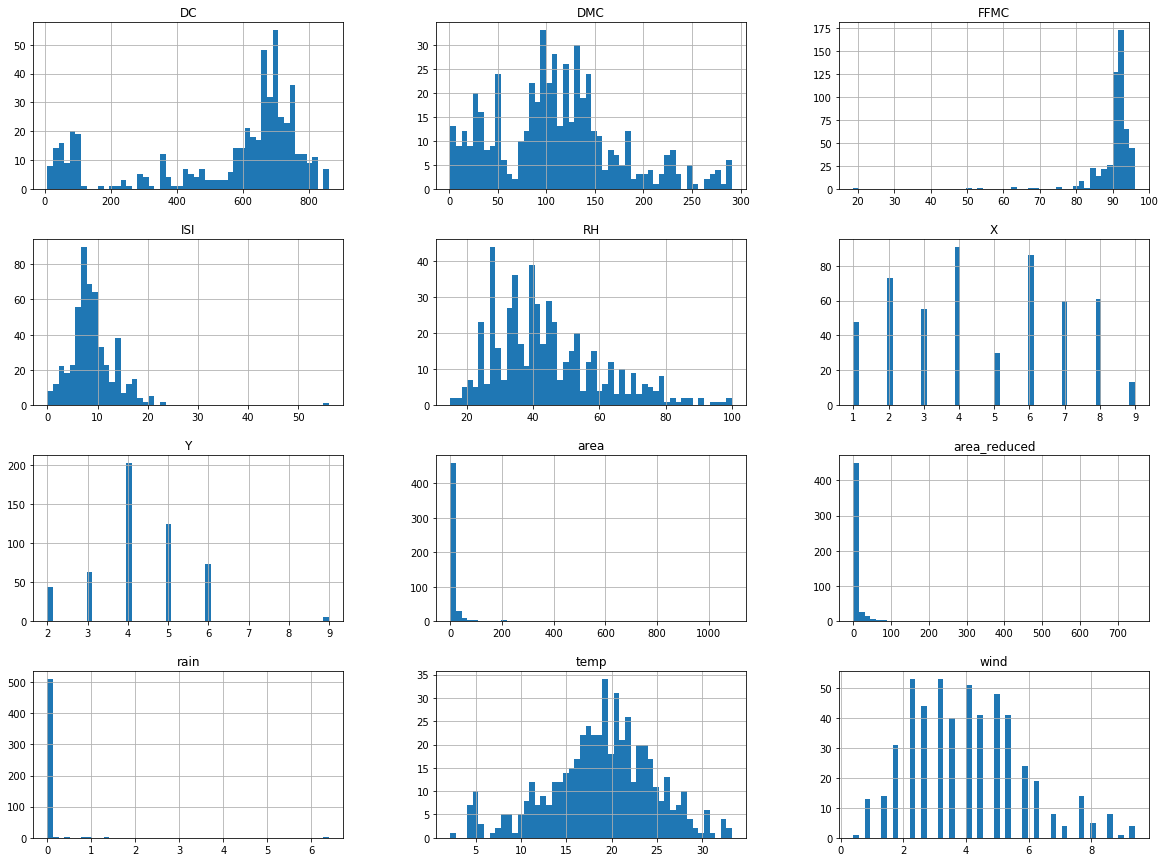

In [17]:
# Let's plot some histograms to have a previzualisation of some of the data
df.hist(bins=50, figsize=(20,15))
plt.show()

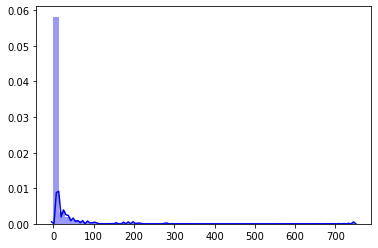

In [18]:
x = df['area_reduced'].values

sns.distplot(x, color = 'blue');


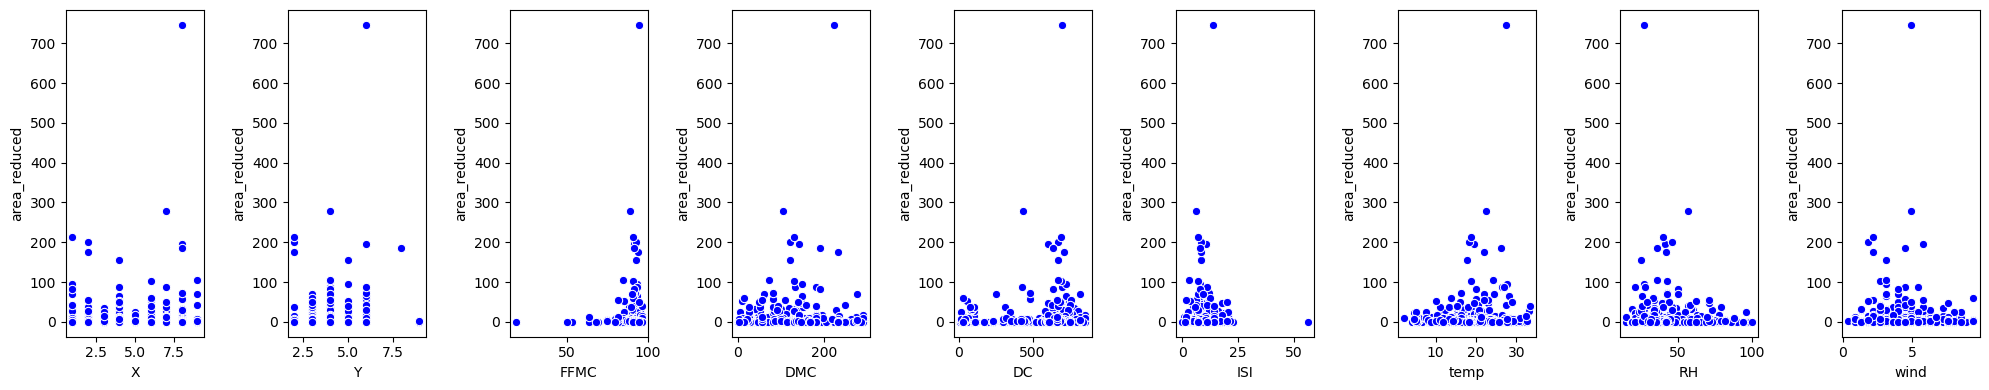

In [19]:
# Let see some visualisation of features

cols = ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,9,i)
    sns.scatterplot(df[col], y="area_reduced", data=df, color = 'blue')
    i = i+1
plt.tight_layout()
plt.show()

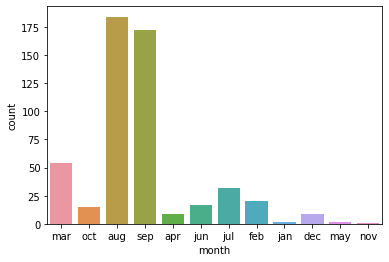

In [20]:
df['month'].value_counts()
sns.countplot(x = df['month'], data = df);

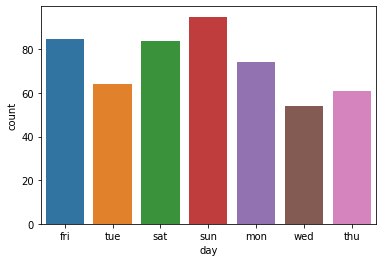

In [21]:
df['day'].value_counts()
sns.countplot(x = df['day'], data = df);

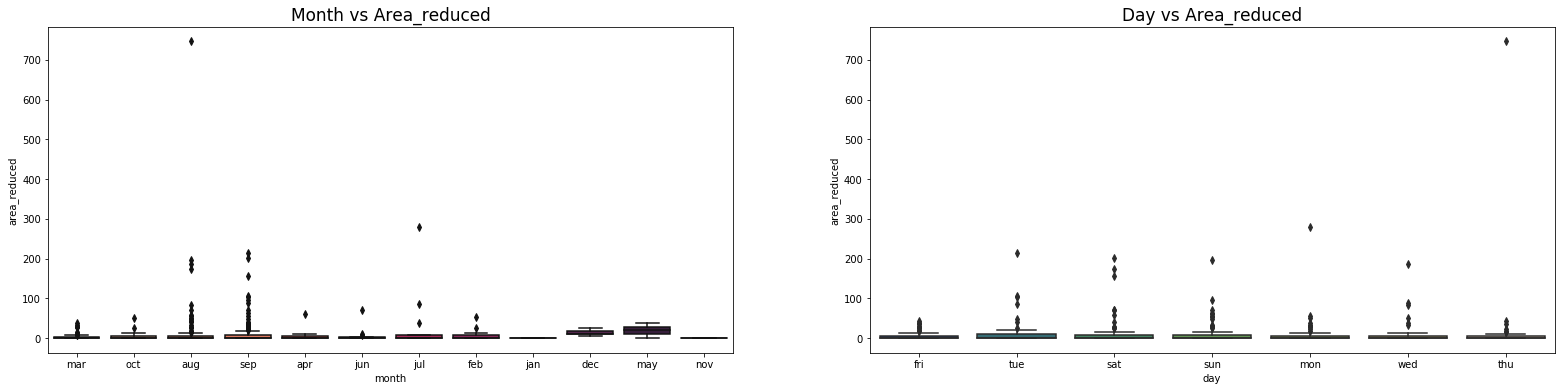

In [22]:
plt.figure(figsize=(27,6))

plt.subplot(1,2,1)
plt.title("Month vs Area_reduced", fontsize=17)
sns.boxplot(data=df, x="month", y='area_reduced', palette='rocket_r')


plt.subplot(1,2,2)
plt.title("Day vs Area_reduced", fontsize=17)
sns.boxplot(data=df, x='day',y='area_reduced', palette='gist_earth')

plt.show()


# Preprocessing

In [23]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(df.loc[:,['month']])
df_enc = pd.DataFrame(ohe.transform(df.loc[:, ['month']]).toarray(), columns=ohe.get_feature_names())
df_enc.head(3)

,x0_apr,x0_aug,x0_dec,x0_feb,x0_jan,x0_jul,x0_jun,x0_mar,x0_may,x0_nov,x0_oct,x0_sep
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(df.loc[:,['day']])
df_enc2 = pd.DataFrame(ohe.transform(df.loc[:, ['day']]).toarray(), columns=ohe.get_feature_names())
df_enc2.head(3)

,x0_fri,x0_mon,x0_sat,x0_sun,x0_thu,x0_tue,x0_wed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
# Now we will merge this two dataframes data_2 and df_enc by index
df_transform = pd.concat([df,df_enc,df_enc2], axis=1)

In [26]:
df_ml=df_transform.drop(['month','day', 'area'], axis=1)
df_ml.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,x0_nov,x0_oct,x0_sep,x0_fri,x0_mon,x0_sat,x0_sun,x0_thu,x0_tue,x0_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
X = df_ml.drop(['area_reduced'], axis=1)
y = df_ml['area_reduced']
display(X.head(5))
display(y)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,x0_nov,x0_oct,x0_sep,x0_fri,x0_mon,x0_sat,x0_sun,x0_thu,x0_tue,x0_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area_reduced, Length: 517, dtype: float64

In [28]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.05, random_state=0)

In [29]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (491, 29)
y_train shape: (491,)
X_test shape: (26, 29)
y_test shape: (26,)


In [30]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)
col_names = list(X.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
df_norm.head(3)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,x0_nov,x0_oct,x0_sep,x0_fri,x0_mon,x0_sat,x0_sun,x0_thu,x0_tue,x0_wed
0,0.500,0.571429,0.975484,0.289456,0.802627,0.283422,0.762058,0.105882,0.364706,0.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.750,0.428571,0.998710,0.620262,0.777882,0.254902,0.623794,0.588235,0.470588,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.625,0.428571,0.953548,0.393866,0.902076,0.156863,0.710611,0.141176,0.470588,0.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


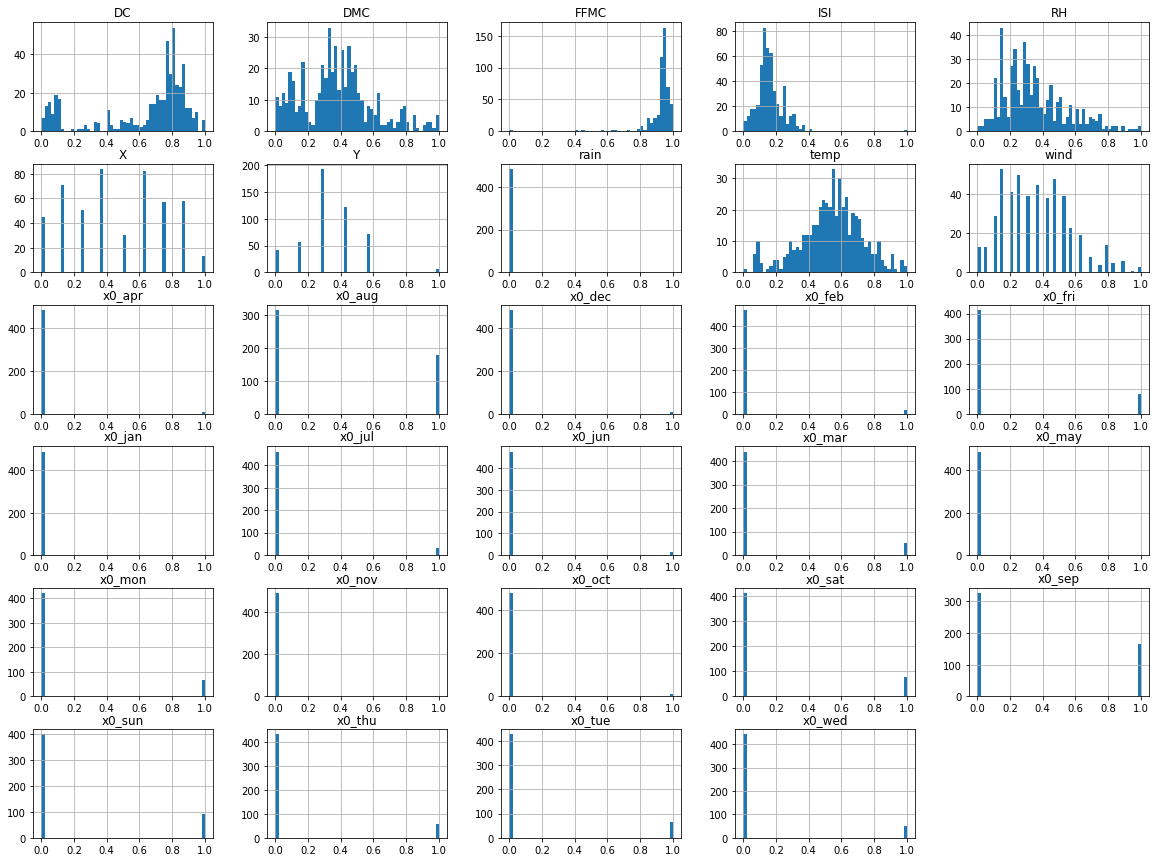

In [31]:
# Visualize normalized data
df_norm.hist(bins=50, figsize=(20,15))
plt.show()

In [32]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
col_names = list(X.columns)
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
df_std.head(3)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,x0_nov,x0_oct,x0_sep,x0_fri,x0_mon,x0_sat,x0_sun,x0_thu,x0_tue,x0_wed
0,0.137981,1.362268,0.649109,-0.410128,0.576418,1.489863,1.203060,-1.238902,-0.007242,-0.075194,...,-0.045175,-0.164914,1.405616,-0.434583,-0.40436,-0.43789,-0.483393,-0.369559,-0.387147,3.003399
1,1.001024,0.550528,0.969692,1.102152,0.490655,1.141145,0.456741,1.259879,0.500732,2.561963,...,-0.045175,-0.164914,-0.711432,-0.434583,-0.40436,-0.43789,-0.483393,-0.369559,2.582997,-0.332956
2,0.569503,0.550528,0.346337,0.067186,0.921097,-0.057572,0.925360,-1.056064,0.500732,-0.075194,...,-0.045175,-0.164914,1.405616,-0.434583,-0.40436,-0.43789,-0.483393,-0.369559,-0.387147,3.003399


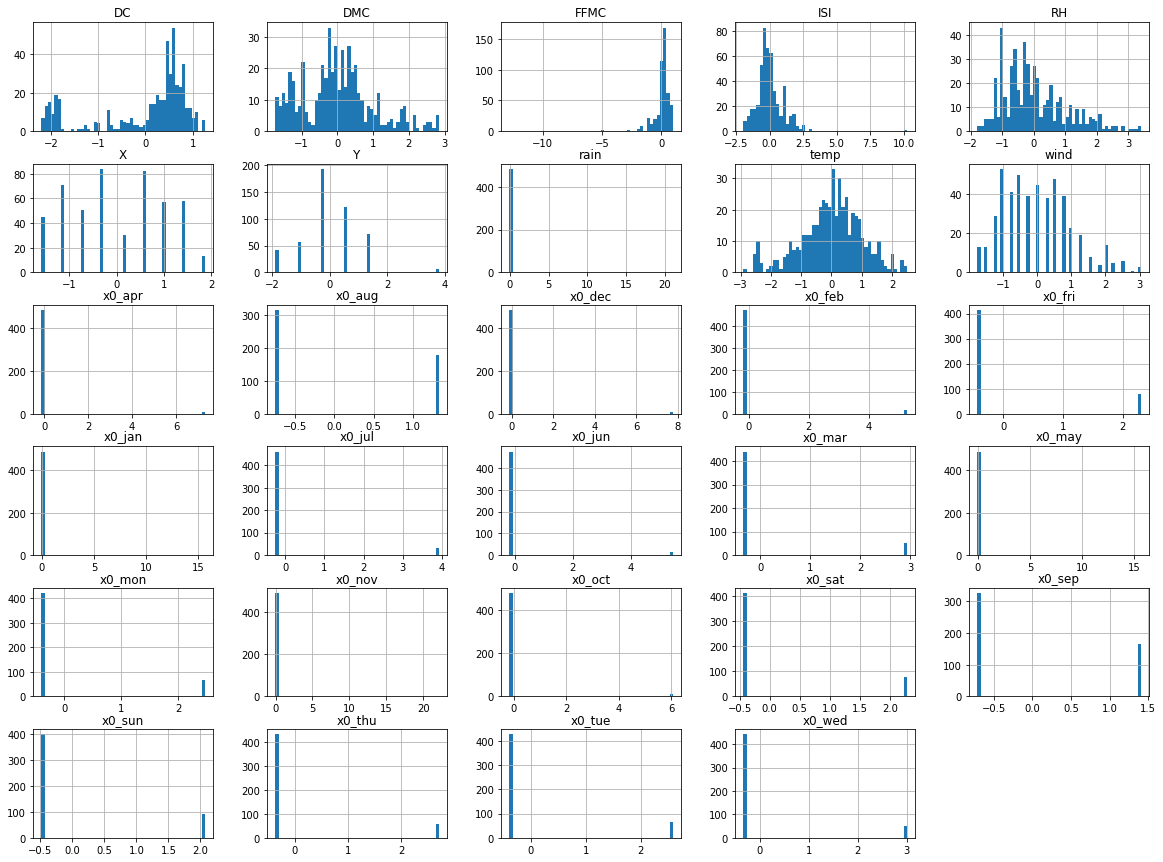

In [33]:
## Visualize standardized data
df_std.hist(bins=50, figsize=(20,15))
plt.show()

In [34]:
# Import  mean_squere_error and mea_absolute_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [35]:
MSE = {}
MAE = {}
RMSE={}

In [36]:
# Define function to go through models
def models(model, X_train, y_train, X_test, y_test, model_name):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    MSE[model_name] = mean_squared_error(y_test, y_pred)
    print(f"Mean_squared_error of {model_name}: {MSE[model_name]}\n")
    RMSE[model_name]=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print(f'RMSE: {RMSE[model_name]}\n')
    MAE[model_name]=mean_absolute_error(y_test,y_pred)              
    print(f'Mean_absolute_error: {MAE[model_name]}\n')
    return model, y_pred

In [37]:
# First model LinearRegression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model1 = models(lin_reg, X_train_std, y_train, X_test_std, y_test, 'Lin_reg')


Mean_squared_error of Lin_reg: 378.55866193888363

RMSE: 19.45658402543683

Mean_absolute_error: 12.19771177650535



In [38]:
# Second model SVC kernel linear
from sklearn.svm import SVR, LinearSVR
svr_linear = SVR(kernel='linear', C=1)
model2 = models(svr_linear, X_train_std, y_train, X_test_std, y_test, 'svr_linear')

Mean_squared_error of svr_linear: 635.0054741112629

RMSE: 25.199314953213765

Mean_absolute_error: 12.932218957311116



In [39]:
# Third model SVR_rbf

SVR_rbf = SVR()
model3 = models(SVR_rbf, X_train_std, y_train, X_test_std, y_test, 'SVR_rbf')


Mean_squared_error of SVR_rbf: 637.6229009775175

RMSE: 25.251196030634222

Mean_absolute_error: 13.104354329910146



In [40]:
# Forth model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

ran_for_reg = RandomForestRegressor()
model4 = models(ran_for_reg, X_train_std, y_train, X_test_std, y_test, 'ran_for_reg')

Mean_squared_error of ran_for_reg: 792.7707492050645

RMSE: 28.156184919215608

Mean_absolute_error: 16.299722820512823



Text(0, 0.5, 'Testing Accuracy')

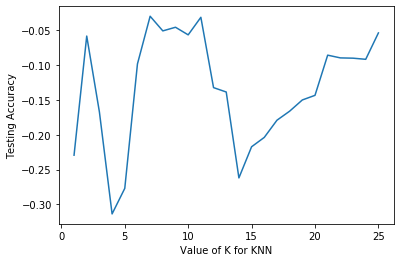

In [41]:
# Fifth model KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.mean_squared_error(y_test,y_pred)
        scores_list.append(metrics.r2_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [42]:
KNN = KNeighborsRegressor()
model4 = models(KNN, X_train_std, y_train, X_test_std, y_test, 'KNN')

Mean_squared_error of KNN: 617.1489406153846

RMSE: 24.842482577540125

Mean_absolute_error: 15.064769230769233



In [43]:
# 6th XGBoostRegressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

model5 = models(xg_reg, X_train_std, y_train, X_test_std, y_test, 'xg_reg')

Mean_squared_error of xg_reg: 508.76786252962995

RMSE: 22.555883102411

Mean_absolute_error: 11.93084962771489



In [44]:
# 7th model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model7= models(dec_tree_reg, X_train_std, y_train, X_test_std, y_test, 'dec_tree_reg')

Mean_squared_error of dec_tree_reg: 2697.4702432692307

RMSE: 51.93717592697191

Mean_absolute_error: 28.575961538461538



In [45]:
# 8th model ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_reg_extra_tree = BaggingRegressor(extra_tree, random_state=0)

model8= models(bag_reg_extra_tree, X_train_std, y_train, X_test_std, y_test, 'bag_reg_extra_tree')

Mean_squared_error of bag_reg_extra_tree: 592.6696553247863

RMSE: 24.34480756393006

Mean_absolute_error: 14.385410256410257



In [46]:
#9th model RANSACRegressor

from sklearn.linear_model import RANSACRegressor

ransa = RANSACRegressor()

model9= models(ransa, X_train_std, y_train, X_test_std, y_test, 'ransa')

Mean_squared_error of ransa: 634.6806640618742

RMSE: 25.192869309824044

Mean_absolute_error: 13.542308547245597



In [47]:
#10th model lasso
from sklearn.linear_model import Lasso

lasso = Lasso()

model10= models(lasso, X_train_std, y_train, X_test_std, y_test, 'lasso')


Mean_squared_error of lasso: 451.1286426452528

RMSE: 21.23978913843668

Mean_absolute_error: 12.850851331492292



In [48]:
# Lets see the results of models of MSE
df_MSE = pd.DataFrame({'Models': list(MSE.keys()),
                          'MSE': list(MSE.values())})
df_MSE

,Models,MSE
0,Lin_reg,378.558662
1,svr_linear,635.005474
2,SVR_rbf,637.622901
3,ran_for_reg,792.770749
4,KNN,617.148941
5,xg_reg,508.767863
6,dec_tree_reg,2697.470243
7,bag_reg_extra_tree,592.669655
8,ransa,634.680664
9,lasso,451.128643


[Text(0, 0.5, 'MSE')]

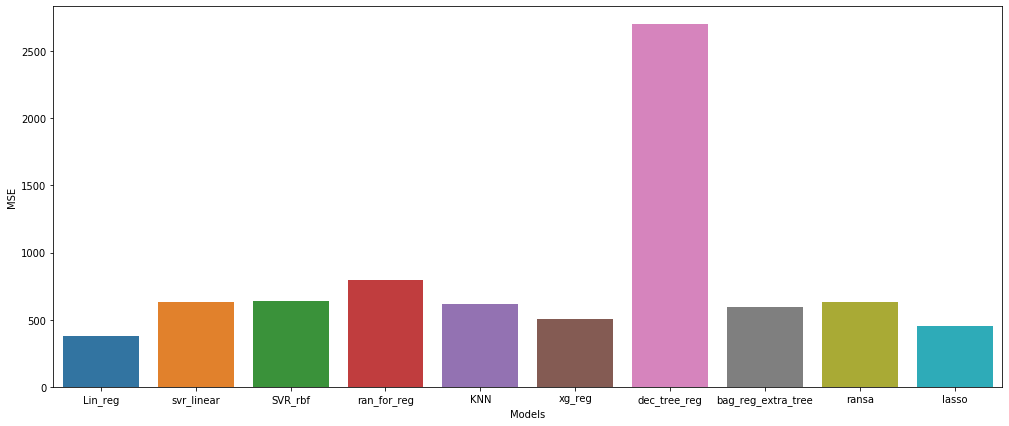

In [49]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "Models", y = "MSE", data = df_MSE)
ax.set(ylabel = "MSE")

In [50]:
# Model with the smalest error
print(f"The model with the smallest Mean_square_error is {min(MSE, key=MSE.get)} and it's error is {MSE[min(MSE, key=MSE.get)]}")

The model with the smallest Mean_square_error is Lin_reg and it's error is 378.55866193888363


In [51]:
# Lets see the results of models of MAE
df_MAE = pd.DataFrame({'Models': list(MAE.keys()),
                          'MAE': list(MAE.values())})
df_MAE

,Models,MAE
0,Lin_reg,12.197712
1,svr_linear,12.932219
2,SVR_rbf,13.104354
3,ran_for_reg,16.299723
4,KNN,15.064769
5,xg_reg,11.930850
6,dec_tree_reg,28.575962
7,bag_reg_extra_tree,14.385410
8,ransa,13.542309
9,lasso,12.850851


In [52]:
# Model with the smalest error
print(f"The model with the smallest Mean_absolut_error is {min(MAE, key=MAE.get)} and it's error is {MAE[min(MAE, key=MAE.get)]}")

The model with the smallest Mean_absolut_error is xg_reg and it's error is 11.93084962771489


In [53]:
# At the end let see how good is our prediction
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check.head(5)

,Actual,Predicted
213,27.35,6.3776
435,0.00,12.6148
343,2.18,4.6472
230,88.49,9.3920
171,2.69,14.9552


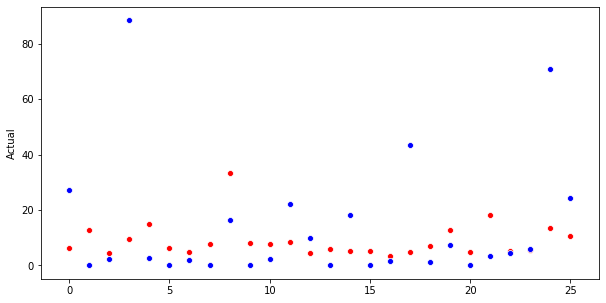

In [54]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=range(len(df_check)), y="Predicted", color='red',data=df_check)
ax = sns.scatterplot(x=range(len(df_check)), y="Actual", color='blue',data=df_check)


# THE END